<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/SignalTransLine_Metamaterial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

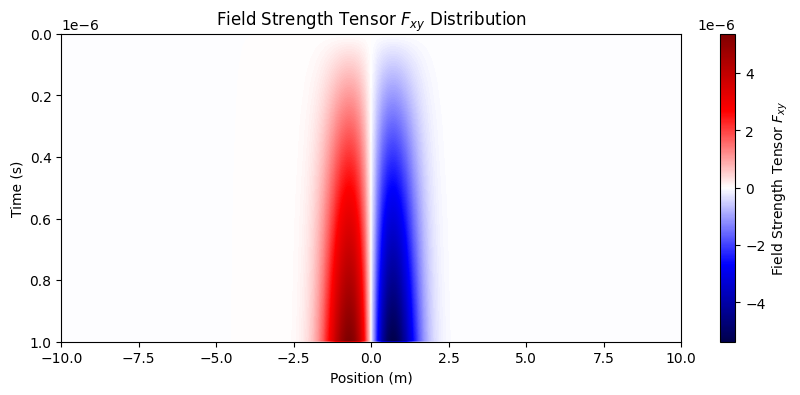

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

# Define parameters and initial conditions
L = 1e-5  # Inductance (H/m)
C = 1e-11  # Capacitance (F/m)
V0 = 50.0  # Initial voltage amplitude (V)
sigma = 1.0  # Width of the initial pulse
ig = 50.0  # Coupling constant for gauge interaction

# Define space and time range
x_range = np.linspace(-10, 10, 500)  # Space (m)
t_range = np.linspace(0, 1e-6, 1000)  # Time (s)

# Initialize fields
V = np.zeros((len(t_range), len(x_range)))
I = np.zeros((len(t_range), len(x_range)))
A_mu = np.zeros((len(t_range), len(x_range)))  # Vector potential

# Initial condition for voltage
V[0, :] = V0 * np.exp(-x_range**2 / sigma**2)

# Finite difference method for propagation
dx = x_range[1] - x_range[0]
dt = t_range[1] - t_range[0]
c1 = dt / L
c2 = dt * C

for n in range(len(t_range) - 1):
    for i in range(1, len(x_range) - 1):
        dV_dx = (V[n, i + 1] - V[n, i - 1]) / (2 * dx)
        dI_dx = (I[n, i + 1] - I[n, i - 1]) / (2 * dx)

        # Covariant derivative for current and voltage
        D_mu_I = dV_dx + ig * A_mu[n, i] * V[n, i]
        D_mu_V = dI_dx + ig * A_mu[n, i] * I[n, i]

        I[n + 1, i] = I[n, i] - c1 * D_mu_I
        V[n + 1, i] = V[n, i] - c2 * D_mu_V

        # Update vector potential
        A_mu[n + 1, i] = A_mu[n, i] + mu_0 * I[n, i] * dt

# Calculate the field strength tensor F_xy
F_xy = np.zeros((len(t_range), len(x_range)))
for n in range(1, len(t_range) - 1):
    for i in range(1, len(x_range) - 1):
        F_xy[n, i] = (A_mu[n, i + 1] - A_mu[n, i - 1]) / (2 * dx) - (A_mu[n + 1, i] - A_mu[n - 1, i]) / (2 * dt)

# Plotting F_xy to detect topological states
plt.figure(figsize=(10, 4))
plt.imshow(F_xy, extent=[x_range[0], x_range[-1], t_range[-1], t_range[0]], aspect='auto', cmap='seismic')
plt.colorbar(label='Field Strength Tensor $F_{xy}$')
plt.xlabel('Position (m)')
plt.ylabel('Time (s)')
plt.title('Field Strength Tensor $F_{xy}$ Distribution')
plt.show()
